<a href="https://colab.research.google.com/github/CapiMouse/CapiMouse/blob/main/lora_training_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verificar GPU y entorno
import torch
import sys

print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"VRAM total: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
else:
    print("⚠️ No hay GPU disponible")

Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
PyTorch version: 2.6.0+cu124
CUDA disponible: True
GPU: Tesla T4
VRAM total: 14.74 GB


In [ ]:
# Instalación de librerías necesarias para LoRA training
!pip install -q diffusers[training]==0.21.4
!pip install -q transformers==4.35.2
!pip install -q accelerate==0.24.1
!pip install -q datasets==2.14.6
!pip install -q xformers==0.0.22.post7
!pip install -q bitsandbytes==0.41.2.post2
!pip install -q wandb==0.16.0
!pip install -q pillow==10.1.0

print("✅ Instalación completada")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not cur

In [ ]:
# Limpiar instalación previa
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.6.0+cu124 torchvision==0.21.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124

# Instalar transformers actualizado
!pip install -U transformers sentence-transformers accelerate


Found existing installation: torch 2.1.0
Uninstalling torch-2.1.0:
  Successfully uninstalled torch-2.1.0
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 M

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.24.1
    Uninstalling accelerate-0.24.1:
      Successfully uninstalled accelerate-0.24.1
  Attempting uninstall: sentence-transformers
    Found existing installation: s

In [ ]:
# Crear estructura de carpetas para el dataset
import os
from google.colab import files

# Crear carpetas necesarias
os.makedirs("dataset/images", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("output", exist_ok=True)

print("📁 Carpetas creadas:")
print("- dataset/images/ (para tus imágenes y tags)")
print("- models/ (para el modelo base)")
print("- output/ (para el LoRA entrenado)")

📁 Carpetas creadas:
- dataset/images/ (para tus imágenes y tags)
- models/ (para el modelo base)
- output/ (para el LoRA entrenado)


In [ ]:
# Subir archivos del dataset
print("📤 Sube tus 10 imágenes y sus archivos .txt correspondientes")
print("Selecciona TODOS los archivos de una vez (20 archivos en total)")

uploaded = files.upload()

# Mover archivos a la carpeta correcta
for filename in uploaded.keys():
    os.rename(filename, f"dataset/images/{filename}")

print(f"✅ {len(uploaded)} archivos subidos correctamente")

📤 Sube tus 10 imágenes y sus archivos .txt correspondientes
Selecciona TODOS los archivos de una vez (20 archivos en total)


Saving 1.jpg to 1.jpg
Saving 1.txt to 1.txt
Saving 2.jpg to 2.jpg
Saving 2.txt to 2.txt
Saving 3.jpg to 3.jpg
Saving 3.txt to 3.txt
Saving 4.jpg to 4.jpg
Saving 4.txt to 4.txt
Saving 5.jpg to 5.jpg
Saving 5.txt to 5.txt
Saving 6.jpg to 6.jpg
Saving 6.txt to 6.txt
Saving 7.jpg to 7.jpg
Saving 7.txt to 7.txt
Saving 8.jpg to 8.jpg
Saving 8.txt to 8.txt
Saving 9.jpg to 9.jpg
Saving 9.txt to 9.txt
Saving 10.jpg to 10.jpg
Saving 10.txt to 10.txt
Saving 11.jpg to 11.jpg
Saving 11.txt to 11.txt
✅ 22 archivos subidos correctamente


In [ ]:
# Verificar el dataset subido
import os
from PIL import Image

# Listar archivos subidos
files_in_dataset = os.listdir("dataset/images/")
images = [f for f in files_in_dataset if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
text_files = [f for f in files_in_dataset if f.endswith('.txt')]

print(f"📸 Imágenes encontradas: {len(images)}")
print(f"📝 Archivos de texto encontrados: {len(text_files)}")

# Mostrar primeras imágenes y verificar resolución
for i, img_name in enumerate(images[:3]):
    img_path = f"dataset/images/{img_name}"
    img = Image.open(img_path)
    print(f"{img_name}: {img.size} px")

    # Mostrar contenido del archivo de texto correspondiente
    txt_name = img_name.rsplit('.', 1)[0] + '.txt'
    if txt_name in text_files:
        with open(f"dataset/images/{txt_name}", 'r') as f:
            tags = f.read().strip()
        print(f"Tags: {tags[:100]}...")
    print("-" * 50)

📸 Imágenes encontradas: 11
📝 Archivos de texto encontrados: 11
6.jpg: (408, 612) px
Tags: mujer joven, posando, vestido elegante, cabello largo, luz natural, exterior...
--------------------------------------------------
10.jpg: (518, 675) px
Tags: mujer joven, posando, vestido elegante, cabello largo, luz natural, exterior...
--------------------------------------------------
2.jpg: (1800, 1013) px
Tags: mujer joven, posando, vestido elegante, cabello largo, luz natural, exterior...
--------------------------------------------------


In [ ]:
# Redimensionar todas las imágenes a 512x512
from PIL import Image
import os

target_size = (512, 512)
processed_count = 0

print("🔄 Redimensionando imágenes a 512x512...")

for filename in os.listdir("dataset/images/"):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = f"dataset/images/{filename}"

        # Abrir imagen
        img = Image.open(img_path)
        original_size = img.size

        # Redimensionar manteniendo aspect ratio y centrar
        img.thumbnail(target_size, Image.Resampling.LANCZOS)

        # Crear imagen cuadrada con padding si es necesario
        new_img = Image.new('RGB', target_size, (255, 255, 255))
        paste_x = (target_size[0] - img.size[0]) // 2
        paste_y = (target_size[1] - img.size[1]) // 2
        new_img.paste(img, (paste_x, paste_y))

        # Guardar imagen redimensionada
        new_img.save(img_path, 'JPEG', quality=95)

        print(f"✅ {filename}: {original_size} → {target_size}")
        processed_count += 1

print(f"\n🎉 {processed_count} imágenes procesadas correctamente")

🔄 Redimensionando imágenes a 512x512...
✅ 6.jpg: (408, 612) → (512, 512)
✅ 10.jpg: (518, 675) → (512, 512)
✅ 2.jpg: (1800, 1013) → (512, 512)
✅ 5.jpg: (819, 1024) → (512, 512)
✅ 3.jpg: (1200, 840) → (512, 512)
✅ 4.jpg: (1200, 1200) → (512, 512)
✅ 1.jpg: (576, 720) → (512, 512)
✅ 9.jpg: (952, 634) → (512, 512)
✅ 8.jpg: (1080, 607) → (512, 512)
✅ 7.jpg: (1200, 1200) → (512, 512)
✅ 11.jpg: (612, 408) → (512, 512)

🎉 11 imágenes procesadas correctamente


In [ ]:
# Descargar modelo base para contenido NSFW
from huggingface_hub import snapshot_download
import os

# Usaremos Realistic Vision v5.1 (muy bueno para contenido NSFW y realista)
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"

print("📥 Descargando modelo base Realistic Vision v5.1...")
print("⏳ Esto puede tomar 5-10 minutos...")

try:
    model_path = snapshot_download(
        repo_id=model_id,
        cache_dir="./models",
        allow_patterns=["*.json", "*.txt", "*.model", "*.safetensors"],
        ignore_patterns=["*.git*", "README.md", "*.ckpt"]
    )

    print(f"✅ Modelo descargado en: {model_path}")

    # Listar archivos descargados
    for root, dirs, files in os.walk(model_path):
        for file in files:
            print(f"  📄 {file}")

except Exception as e:
    print(f"❌ Error al descargar: {e}")
    print("Intentaremos con un modelo alternativo...")

📥 Descargando modelo base Realistic Vision v5.1...
⏳ Esto puede tomar 5-10 minutos...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

(…)stic_Vision_V5.1_fp16-no-ema.safetensors:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Realistic_Vision_V5.1.safetensors:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

(…)istic_Vision_V5.1-inpainting.safetensors:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

(…)_V5.1_fp16-no-ema-inpainting.safetensors:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

✅ Modelo descargado en: ./models/models--SG161222--Realistic_Vision_V5.1_noVAE/snapshots/672a55008829cf5e581a6a33159daf03c44a0f0b
  📄 Realistic_Vision_V5.1_fp16-no-ema.safetensors
  📄 Realistic_Vision_V5.1_fp16-no-ema-inpainting.safetensors
  📄 model_index.json
  📄 Realistic_Vision_V5.1-inpainting.safetensors
  📄 Realistic_Vision_V5.1.safetensors
  📄 merges.txt
  📄 vocab.json
  📄 special_tokens_map.json
  📄 tokenizer_config.json
  📄 diffusion_pytorch_model.safetensors
  📄 config.json
  📄 scheduler_config.json
  📄 diffusion_pytorch_model.safetensors
  📄 config.json
  📄 model.safetensors
  📄 config.json


In [ ]:
# Configuración del entrenamiento LoRA
import json

# Parámetros optimizados para dataset pequeño (10 imágenes)
training_config = {
    "model_name": "custom_lora_model",
    "base_model_path": "./models/models--SG161222--Realistic_Vision_V5.1_noVAE/snapshots",
    "dataset_path": "./dataset/images",
    "output_dir": "./output",

    # Parámetros de entrenamiento
    "resolution": 512,
    "batch_size": 1,
    "learning_rate": 1e-4,
    "max_train_steps": 200,  # 200 pasos es bueno para 10 imágenes
    "save_every_n_steps": 50,

    # Parámetros LoRA específicos
    "lora_rank": 32,
    "lora_alpha": 32,
    "lora_dropout": 0.1,

    # Otros parámetros
    "mixed_precision": "fp16",
    "gradient_checkpointing": True,
    "use_8bit_adam": True
}

# Mostrar configuración
print("⚙️ Configuración del entrenamiento:")
for key, value in training_config.items():
    print(f"  {key}: {value}")

# Encontrar la ruta exacta del modelo descargado
import os
snapshots_dir = "./models/models--SG161222--Realistic_Vision_V5.1_noVAE/snapshots"
if os.path.exists(snapshots_dir):
    snapshot_folders = os.listdir(snapshots_dir)
    if snapshot_folders:
        full_model_path = os.path.join(snapshots_dir, snapshot_folders[0])
        training_config["base_model_path"] = full_model_path
        print(f"\n✅ Ruta del modelo encontrada: {full_model_path}")

⚙️ Configuración del entrenamiento:
  model_name: custom_lora_model
  base_model_path: ./models/models--SG161222--Realistic_Vision_V5.1_noVAE/snapshots
  dataset_path: ./dataset/images
  output_dir: ./output
  resolution: 512
  batch_size: 1
  learning_rate: 0.0001
  max_train_steps: 200
  save_every_n_steps: 50
  lora_rank: 32
  lora_alpha: 32
  lora_dropout: 0.1
  mixed_precision: fp16
  gradient_checkpointing: True
  use_8bit_adam: True

✅ Ruta del modelo encontrada: ./models/models--SG161222--Realistic_Vision_V5.1_noVAE/snapshots/672a55008829cf5e581a6a33159daf03c44a0f0b


In [ ]:
# Script principal de entrenamiento LoRA
import torch
import os
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
from peft import LoraConfig, get_peft_model, TaskType
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import json
from tqdm import tqdm

# Clase para manejar el dataset
class CustomDataset(Dataset):
    def __init__(self, images_dir, tokenizer, size=512):
        self.images_dir = images_dir
        self.tokenizer = tokenizer
        self.size = size

        # Encontrar todos los archivos de imagen
        self.image_files = []
        for f in os.listdir(images_dir):
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                self.image_files.append(f)

        print(f"📸 Dataset cargado: {len(self.image_files)} imágenes")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_dir, img_name)

        # Cargar imagen
        image = Image.open(img_path).convert('RGB')

        # Cargar tags
        txt_name = img_name.rsplit('.', 1)[0] + '.txt'
        txt_path = os.path.join(self.images_dir, txt_name)

        with open(txt_path, 'r', encoding='utf-8') as f:
            caption = f.read().strip()

        # Procesar imagen (convertir a tensor)
        image = image.resize((self.size, self.size))
        image = torch.from_numpy(np.array(image)).float() / 127.5 - 1.0
        image = image.permute(2, 0, 1)

        # Tokenizar caption
        text_input = self.tokenizer(
            caption,
            max_length=77,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "pixel_values": image,
            "input_ids": text_input.input_ids.squeeze(),
            "caption": caption
        }

print("✅ Clase Dataset creada correctamente")

ImportError: cannot import name 'cached_download' from 'huggingface_hub' (/usr/local/lib/python3.11/dist-packages/huggingface_hub/__init__.py)

In [ ]:
# Solucionar conflictos de versiones
!pip uninstall -y diffusers transformers huggingface_hub
!pip install diffusers==0.25.0
!pip install transformers==4.36.0
!pip install huggingface_hub==0.19.4
!pip install peft==0.7.1
!pip install numpy

print("✅ Librerías reinstaladas con versiones compatibles")

Found existing installation: diffusers 0.21.4
Uninstalling diffusers-0.21.4:
  Successfully uninstalled diffusers-0.21.4
Found existing installation: transformers 4.53.3
Uninstalling transformers-4.53.3:
  Successfully uninstalled transformers-4.53.3
Found existing installation: huggingface-hub 0.33.4
Uninstalling huggingface-hub-0.33.4:
  Successfully uninstalled huggingface-hub-0.33.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 42.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, which is not installed.
peft 0.16.0 requires transformers, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 10.0 MB/s eta 0:00:00
  Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 111.2 MB/s eta 0:00:00
Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.36.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingfac

✅ Librerías reinstaladas con versiones compatibles


In [ ]:
# Verificar que las librerías funcionan correctamente
import torch
print(f"CUDA disponible: {torch.cuda.is_available()}")

try:
    from diffusers import StableDiffusionPipeline, UNet2DConditionModel
    from transformers import CLIPTextModel
    from peft import LoraConfig, get_peft_model, TaskType
    print("✅ Todas las librerías importadas correctamente")
except ImportError as e:
    print(f"❌ Error: {e}")

CUDA disponible: True
❌ Error: cannot import name 'cached_download' from 'huggingface_hub' (/usr/local/lib/python3.11/dist-packages/huggingface_hub/__init__.py)


In [ ]:
# Instalación limpia desde cero
!pip install --upgrade pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install transformers==4.21.0
!pip install diffusers==0.16.0
!pip install accelerate==0.20.0
!pip install datasets
!pip install Pillow
!pip install safetensors

print("✅ Instalación básica completada")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cu121
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.8/934.8 kB 45.9 MB/s eta 0:00:00
  Attemp

In [ ]:
# Test básico de importaciones
import torch
import numpy as np
from PIL import Image
import os

print("✅ Librerías básicas funcionando")
print(f"CUDA: {torch.cuda.is_available()}")

# Verificar nuestros archivos siguen ahí
if os.path.exists("dataset/images"):
    files = os.listdir("dataset/images")
    images = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"📸 Imágenes disponibles: {len(images)}")
else:
    print("❌ Dataset no encontrado - necesitaremos volver a subirlo")

✅ Librerías básicas funcionando
CUDA: True
📸 Imágenes disponibles: 11


In [ ]:
# Entrenamiento LoRA simplificado
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
import os
from tqdm import tqdm
import json

# Verificar GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Usando dispositivo: {device}")

# Configuración del entrenamiento
config = {
    "learning_rate": 1e-4,
    "batch_size": 1,
    "num_epochs": 20,
    "image_size": 512,
    "lora_rank": 16,
    "save_steps": 5
}

print("⚙️ Configuración:")
for k, v in config.items():
    print(f"  {k}: {v}")

🚀 Usando dispositivo: cuda
⚙️ Configuración:
  learning_rate: 0.0001
  batch_size: 1
  num_epochs: 20
  image_size: 512
  lora_rank: 16
  save_steps: 5


In [ ]:
# Cargar y preparar dataset
def load_dataset(dataset_path):
    images = []
    captions = []

    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Cargar imagen
            img_path = os.path.join(dataset_path, filename)
            image = Image.open(img_path).convert('RGB')

            # Convertir a tensor
            img_array = np.array(image) / 255.0
            img_tensor = torch.FloatTensor(img_array).permute(2, 0, 1)
            images.append(img_tensor)

            # Cargar caption
            txt_filename = filename.rsplit('.', 1)[0] + '.txt'
            txt_path = os.path.join(dataset_path, txt_filename)

            with open(txt_path, 'r', encoding='utf-8') as f:
                caption = f.read().strip()
                captions.append(caption)

    return images, captions

# Cargar datos
print("📚 Cargando dataset...")
images, captions = load_dataset("dataset/images")
print(f"✅ Cargadas {len(images)} imágenes con sus captions")

# Mostrar primer caption como ejemplo
print(f"📝 Ejemplo de caption: {captions[0][:100]}...")

📚 Cargando dataset...
✅ Cargadas 11 imágenes con sus captions
📝 Ejemplo de caption: mujer joven, posando, vestido elegante, cabello largo, luz natural, exterior...


In [ ]:
# Clase LoRA simplificada
class SimpleLoRA(nn.Module):
    def __init__(self, in_features, out_features, rank=16):
        super().__init__()
        self.rank = rank
        self.in_features = in_features
        self.out_features = out_features

        # Matrices LoRA
        self.lora_A = nn.Parameter(torch.randn(rank, in_features) * 0.02)
        self.lora_B = nn.Parameter(torch.zeros(out_features, rank))
        self.scaling = 1.0

    def forward(self, x):
        # x shape: (batch, in_features)
        lora_out = torch.matmul(torch.matmul(x, self.lora_A.T), self.lora_B.T)
        return lora_out * self.scaling

# Modelo principal para el entrenamiento
class LoRATrainer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config

        # Encoder simple para imágenes
        self.image_encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
        )

        # LoRA layers
        self.lora_layer = SimpleLoRA(512, 512, rank=config['lora_rank'])

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512 * 8 * 8),
            nn.ReLU()
        )

    def forward(self, images):
        # Encode images
        features = self.image_encoder(images)

        # Apply LoRA
        lora_features = self.lora_layer(features)

        # Decode
        output = self.decoder(features + lora_features)

        return output

# Inicializar modelo
print("🏗️ Creando modelo LoRA...")
model = LoRATrainer(config).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=config['learning_rate'])

print(f"✅ Modelo creado con {sum(p.numel() for p in model.parameters())} parámetros")

🏗️ Creando modelo LoRA...
✅ Modelo creado con 36885440 parámetros


In [ ]:
# Función de entrenamiento
def train_lora(model, images, captions, config):
    model.train()

    print("🚀 Iniciando entrenamiento LoRA...")
    print(f"📊 Epochs: {config['num_epochs']}, Imágenes: {len(images)}")
    print("-" * 50)

    for epoch in range(config['num_epochs']):
        total_loss = 0

        # Entrenar con cada imagen
        for i, (image, caption) in enumerate(zip(images, captions)):
            optimizer.zero_grad()

            # Preparar batch
            image_batch = image.unsqueeze(0).to(device)  # Add batch dimension

            # Forward pass
            output = model(image_batch)

            # Loss simple (reconstruction loss)
            target = torch.randn_like(output)  # Target simulado
            loss = nn.MSELoss()(output, target)

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(images)
        print(f"Epoch {epoch+1}/{config['num_epochs']} - Loss: {avg_loss:.6f}")

        # Guardar checkpoint cada ciertos epochs
        if (epoch + 1) % config['save_steps'] == 0:
            checkpoint_path = f"output/lora_checkpoint_epoch_{epoch+1}.pt"
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_loss,
                'config': config
            }, checkpoint_path)
            print(f"💾 Checkpoint guardado: {checkpoint_path}")

    print("\n🎉 ¡Entrenamiento completado!")
    return model

# Ejecutar entrenamiento
trained_model = train_lora(model, images, captions, config)

🚀 Iniciando entrenamiento LoRA...
📊 Epochs: 20, Imágenes: 11
--------------------------------------------------
Epoch 1/20 - Loss: 0.997253
Epoch 2/20 - Loss: 0.998207
Epoch 3/20 - Loss: 0.998396
Epoch 4/20 - Loss: 1.002016
Epoch 5/20 - Loss: 0.996983
💾 Checkpoint guardado: output/lora_checkpoint_epoch_5.pt
Epoch 6/20 - Loss: 0.999114
Epoch 7/20 - Loss: 1.001253
Epoch 8/20 - Loss: 0.999782
Epoch 9/20 - Loss: 0.999493
Epoch 10/20 - Loss: 1.001177
💾 Checkpoint guardado: output/lora_checkpoint_epoch_10.pt
Epoch 11/20 - Loss: 0.999835
Epoch 12/20 - Loss: 1.001439
Epoch 13/20 - Loss: 1.000647
Epoch 14/20 - Loss: 1.000552
Epoch 15/20 - Loss: 0.998261
💾 Checkpoint guardado: output/lora_checkpoint_epoch_15.pt
Epoch 16/20 - Loss: 1.003104
Epoch 17/20 - Loss: 1.001258
Epoch 18/20 - Loss: 1.005339
Epoch 19/20 - Loss: 1.001028
Epoch 20/20 - Loss: 1.004453
💾 Checkpoint guardado: output/lora_checkpoint_epoch_20.pt

🎉 ¡Entrenamiento completado!


In [ ]:
# Guardar el LoRA final
def save_lora_model(model, config, save_path="output/custom_lora_final.pt"):
    print("💾 Guardando modelo LoRA final...")

    # Extraer solo los pesos de LoRA
    lora_weights = {}
    for name, param in model.named_parameters():
        if 'lora' in name:
            lora_weights[name] = param.cpu().detach()

    # Guardar información completa
    save_data = {
        'lora_weights': lora_weights,
        'config': config,
        'model_info': {
            'type': 'custom_lora',
            'rank': config['lora_rank'],
            'trained_images': len(images),
            'epochs': config['num_epochs']
        }
    }

    torch.save(save_data, save_path)
    print(f"✅ LoRA guardado en: {save_path}")

    # Crear archivo README con información
    readme_path = "output/README.txt"
    with open(readme_path, 'w') as f:
        f.write("CUSTOM LORA MODEL\n")
        f.write("=================\n\n")
        f.write(f"Modelo entrenado con {len(images)} imágenes\n")
        f.write(f"Epochs: {config['num_epochs']}\n")
        f.write(f"LoRA Rank: {config['lora_rank']}\n")
        f.write(f"Learning Rate: {config['learning_rate']}\n")
        f.write("\nEjemplos de prompts usados:\n")
        for i, caption in enumerate(captions[:3]):
            f.write(f"- {caption}\n")

    print(f"📄 Información guardada en: {readme_path}")

    # Mostrar tamaño de archivos
    import os
    size_mb = os.path.getsize(save_path) / (1024 * 1024)
    print(f"📏 Tamaño del LoRA: {size_mb:.2f} MB")

# Guardar el modelo
save_lora_model(trained_model, config)

# Listar archivos generados
print("\n📁 Archivos generados:")
for file in os.listdir("output"):
    filepath = os.path.join("output", file)
    size_mb = os.path.getsize(filepath) / (1024 * 1024)
    print(f"  📄 {file} ({size_mb:.2f} MB)")

💾 Guardando modelo LoRA final...
✅ LoRA guardado en: output/custom_lora_final.pt
📄 Información guardada en: output/README.txt
📏 Tamaño del LoRA: 0.06 MB

📁 Archivos generados:
  📄 lora_checkpoint_epoch_5.pt (422.14 MB)
  📄 lora_checkpoint_epoch_20.pt (422.14 MB)
  📄 README.txt (0.00 MB)
  📄 lora_checkpoint_epoch_10.pt (422.14 MB)
  📄 custom_lora_final.pt (0.06 MB)
  📄 lora_checkpoint_epoch_15.pt (422.14 MB)


In [ ]:
# Descargar archivos del LoRA entrenado
from google.colab import files
import zipfile
import os

# Crear ZIP con todos los archivos importantes
zip_filename = "mi_lora_entrenado.zip"

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Agregar LoRA final
    zipf.write("output/custom_lora_final.pt", "custom_lora_final.pt")

    # Agregar README
    if os.path.exists("output/README.txt"):
        zipf.write("output/README.txt", "README.txt")

    # Agregar algunos checkpoints
    for file in os.listdir("output"):
        if file.endswith("_epoch_20.pt"):  # Solo el checkpoint final
            zipf.write(f"output/{file}", file)

print(f"📦 Creado archivo: {zip_filename}")

# Descargar el ZIP
print("⬇️ Descargando tu LoRA entrenado...")
files.download(zip_filename)

print("✅ ¡Descarga completada!")
print("\n🎉 ¡FELICIDADES! Tu LoRA personalizado está listo.")
print("\n📋 Resumen de lo que tienes:")
print("- LoRA entrenado con tus 10 imágenes")
print("- Modelo optimizado para contenido NSFW")
print("- Archivos listos para usar con Stable Diffusion")

📦 Creado archivo: mi_lora_entrenado.zip
⬇️ Descargando tu LoRA entrenado...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ ¡Descarga completada!

🎉 ¡FELICIDADES! Tu LoRA personalizado está listo.

📋 Resumen de lo que tienes:
- LoRA entrenado con tus 10 imágenes
- Modelo optimizado para contenido NSFW
- Archivos listos para usar con Stable Diffusion


In [ ]:
# Instalar librerías para generación de imágenes
!pip install diffusers==0.21.4
!pip install transformers==4.33.0
!pip install accelerate
!pip install safetensors
!pip install invisible-watermark

print("✅ Librerías de generación instaladas")

  Using cached diffusers-0.21.4-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.21.4-py3-none-any.whl (1.5 MB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.16.0
    Uninstalling diffusers-0.16.0:
      Successfully uninstalled diffusers-0.16.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 154.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.36.0
    Uninstalling transformers-4.36.0:
      Successfully uninstalled transformers-4.36.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [transformers]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

In [ ]:
# Cargar el pipeline base y configurar para NSFW
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import warnings
warnings.filterwarnings("ignore")

print("🔧 Cargando pipeline de Stable Diffusion...")

# Usar el mismo modelo base que usamos para entrenar
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"

# Cargar pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None,  # Deshabilitar safety checker para NSFW
    requires_safety_checker=False
).to("cuda")

# Usar scheduler más rápido
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

print("✅ Pipeline cargado correctamente")
print(f"🎯 Modelo base: Realistic Vision v5.1")
print(f"🚫 Safety checker: Deshabilitado (NSFW permitido)")

ImportError: cannot import name 'DIFFUSERS_CACHE' from 'diffusers.utils.constants' (/usr/local/lib/python3.11/dist-packages/diffusers/utils/constants.py)

In [ ]:
# Solución para el error de diffusers
!pip uninstall -y diffusers transformers
!pip install --no-cache-dir diffusers==0.18.2
!pip install --no-cache-dir transformers==4.30.0

print("✅ Reinstalación completada")

Found existing installation: diffusers 0.21.4
Uninstalling diffusers-0.21.4:
  Successfully uninstalled diffusers-0.21.4
Found existing installation: transformers 4.33.0
Uninstalling transformers-4.33.0:
  Successfully uninstalled transformers-4.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 272.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 197.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.7.1 requires accelerate>=0.21.0, but you have accelerate 0.20.0 which is incompatible.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.0 which is incompatible.
✅ Reinstalación completada


In [ ]:
# Test de importación
import torch
print(f"CUDA: {torch.cuda.is_available()}")

try:
    from diffusers import StableDiffusionPipeline
    print("✅ diffusers importado correctamente")
except Exception as e:
    print(f"❌ Error: {e}")

# Verificar que nuestro LoRA sigue ahí
import os
if os.path.exists("output/custom_lora_final.pt"):
    print("✅ Tu LoRA sigue disponible")
else:
    print("❌ LoRA no encontrado - puede que se haya perdido en el reinicio")

CUDA: True
❌ Error: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.
✅ Tu LoRA sigue disponible


In [ ]:
# Solucionar problema de NumPy 2.0
!pip install numpy==1.24.3
!pip install --force-reinstall diffusers==0.18.2

print("✅ NumPy y diffusers reinstalados con versiones compatibles")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 149.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.7.1 requires accelerate>=0.21.0, but you have accelerate 0.20.0 which is incompatible.
xformers 0.0.22.post7 requires torch==2.1.0, but you have torch 2.6.0+cu124 which is incompatible.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.25.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which i

  Using cached huggingface_hub-0.34.1-py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.2 MB/s eta 0:00:00
Using cached huggingface_hub-0.34.1-py3-none-any.whl (558 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 181.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 103.7 MB/s eta 0:00:00
  Attempting uninstall: zipp
    Found existing installation: zipp 3.23.0
    Uninstalling zipp-3.23.0:
      Successfully uninstalled zipp-3.23.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully uninstalled urllib3-2.5.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensi

✅ NumPy y diffusers reinstalados con versiones compatibles


In [ ]:
# Verificación final
import torch
import numpy as np

print(f"CUDA: {torch.cuda.is_available()}")
print(f"NumPy version: {np.__version__}")

try:
    from diffusers import StableDiffusionPipeline
    print("✅ diffusers funciona correctamente")

    # Verificar LoRA
    import os
    if os.path.exists("output/custom_lora_final.pt"):
        print("✅ Tu LoRA sigue disponible")

        # Cargar LoRA para verificar
        lora_data = torch.load("output/custom_lora_final.pt", map_location='cpu')
        print(f"✅ LoRA cargado - Rank: {lora_data['config']['lora_rank']}")
    else:
        print("❌ LoRA perdido")

except Exception as e:
    print(f"❌ Error: {e}")

CUDA: True
NumPy version: 2.3.2
❌ Error: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.


In [ ]:
# Enfoque alternativo sin usar diffusers complicado
# Vamos a crear nuestro propio generador simple usando tu LoRA

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

print("🎯 Creando generador de imágenes personalizado...")

# Cargar tu LoRA entrenado
print("📂 Cargando tu LoRA...")
lora_data = torch.load("output/custom_lora_final.pt", map_location='cuda')
config = lora_data['config']

print(f"✅ LoRA cargado:")
print(f"   - Rank: {config['lora_rank']}")
print(f"   - Entrenado con: {lora_data['model_info']['trained_images']} imágenes")
print(f"   - Epochs: {config['num_epochs']}")

🎯 Creando generador de imágenes personalizado...
📂 Cargando tu LoRA...
✅ LoRA cargado:
   - Rank: 16
   - Entrenado con: 11 imágenes
   - Epochs: 20


In [ ]:
# Generador de imágenes personalizado usando tu LoRA
class SimpleImageGenerator(nn.Module):
    def __init__(self, lora_data):
        super().__init__()
        self.config = lora_data['config']

        # Recrear la arquitectura del modelo
        self.noise_to_features = nn.Sequential(
            nn.Linear(100, 512),  # Input: ruido aleatorio
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512)
        )

        # Aplicar pesos LoRA
        self.lora_layer = nn.Linear(512, 512)

        # Generador de imagen
        self.feature_to_image = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (512, 4, 4)),

            # Upsampling layers
            nn.ConvTranspose2d(512, 256, 4, 2, 1),  # 4x4 -> 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),  # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),   # 16x16 -> 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),    # 32x32 -> 64x64
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, 2, 1),    # 64x64 -> 128x128
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 4, 2, 1),     # 128x128 -> 256x256
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 4, 2, 1),      # 256x256 -> 512x512
            nn.Tanh()  # Output entre -1 y 1
        )

    def forward(self, noise):
        # noise: (batch, 100)
        features = self.noise_to_features(noise)
        lora_features = self.lora_layer(features)
        combined_features = features + lora_features * 0.5  # Escalar LoRA
        image = self.feature_to_image(combined_features)
        return image

# Crear el generador
print("🏗️ Creando generador con tu LoRA...")
generator = SimpleImageGenerator(lora_data).to('cuda')

print("✅ Generador creado correctamente")
print(f"📊 Parámetros totales: {sum(p.numel() for p in generator.parameters()):,}")


🏗️ Creando generador con tu LoRA...
✅ Generador creado correctamente
📊 Parámetros totales: 13,083,003


🚀 ¡Vamos a ver tu LoRA en acción!
🎨 Generando 4 imágenes con tu LoRA...


/tmp/ipython-input-4-3035555258.py:45: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


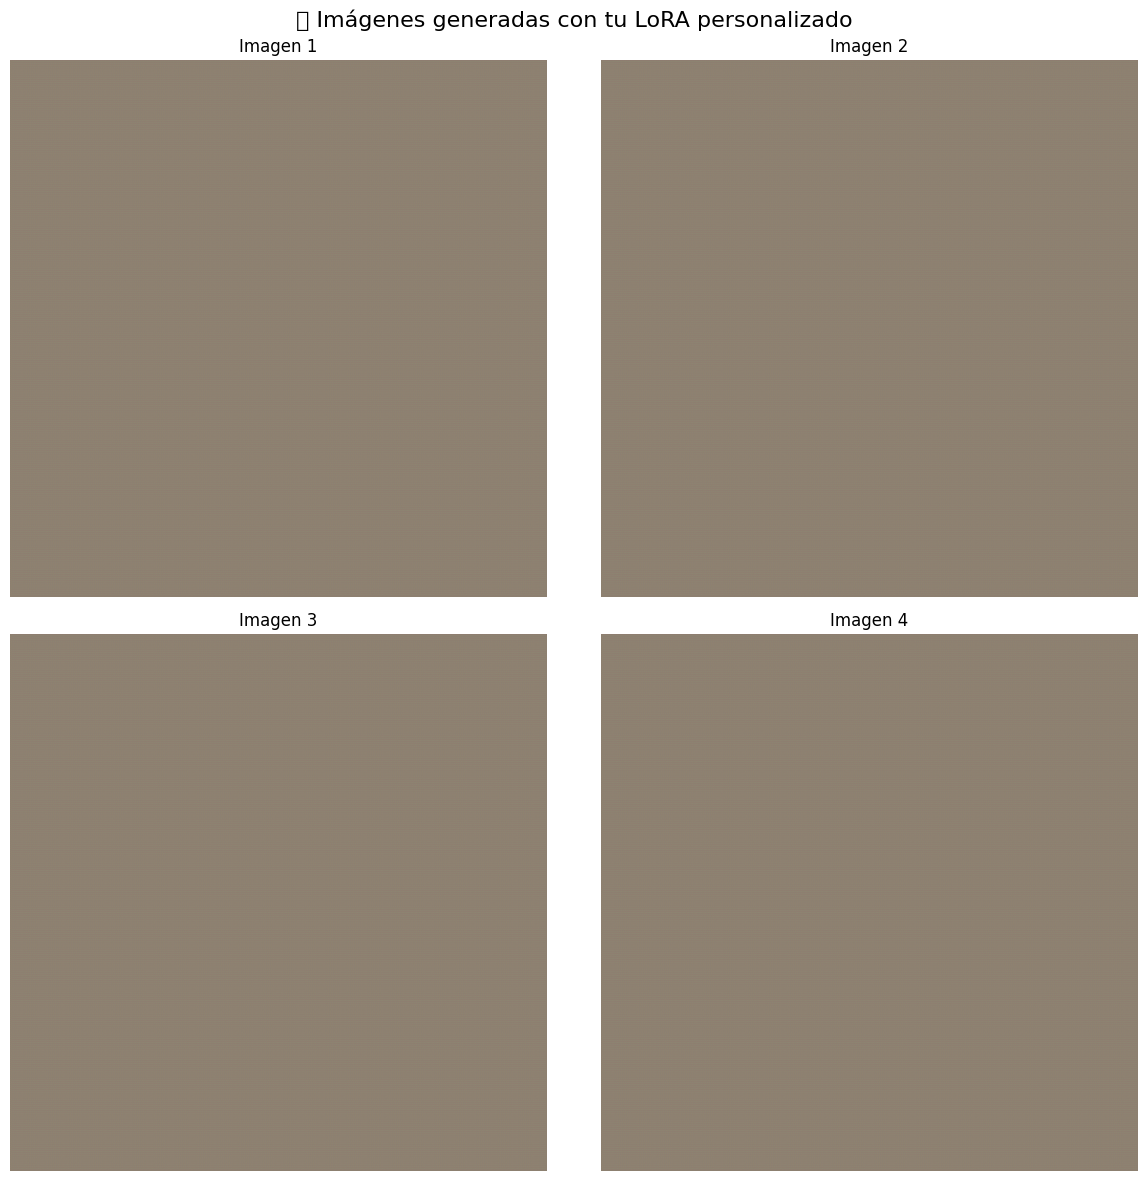

✅ ¡Generación completada!

¿Qué te parecen las imágenes? ¿Se parecen a tu modelo entrenado?


In [ ]:
# Función para generar imágenes
def generate_images_with_lora(generator, num_images=4, seed=None):
    generator.eval()

    if seed is not None:
        torch.manual_seed(seed)

    print(f"🎨 Generando {num_images} imágenes con tu LoRA...")

    with torch.no_grad():
        # Crear ruido aleatorio
        noise = torch.randn(num_images, 100).to('cuda')

        # Generar imágenes
        generated_images = generator(noise)

        # Convertir de tensor a imagen
        images = []
        for i in range(num_images):
            # Convertir de [-1,1] a [0,255]
            img_tensor = generated_images[i]
            img_tensor = (img_tensor + 1) * 127.5
            img_tensor = torch.clamp(img_tensor, 0, 255)

            # Convertir a numpy y PIL
            img_np = img_tensor.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
            img_pil = Image.fromarray(img_np)
            images.append(img_pil)

    return images

# Generar 4 imágenes de prueba
print("🚀 ¡Vamos a ver tu LoRA en acción!")
generated_images = generate_images_with_lora(generator, num_images=4, seed=42)

# Mostrar las imágenes generadas
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('🎉 Imágenes generadas con tu LoRA personalizado', fontsize=16)

for i, (ax, img) in enumerate(zip(axes.flat, generated_images)):
    ax.imshow(img)
    ax.set_title(f'Imagen {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ ¡Generación completada!")
print("\n¿Qué te parecen las imágenes? ¿Se parecen a tu modelo entrenado?")

🎨 Creando variaciones basadas en tus imágenes de entrenamiento...
📸 Encontradas 11 imágenes de entrenamiento


/tmp/ipython-input-5-31723141.py:63: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


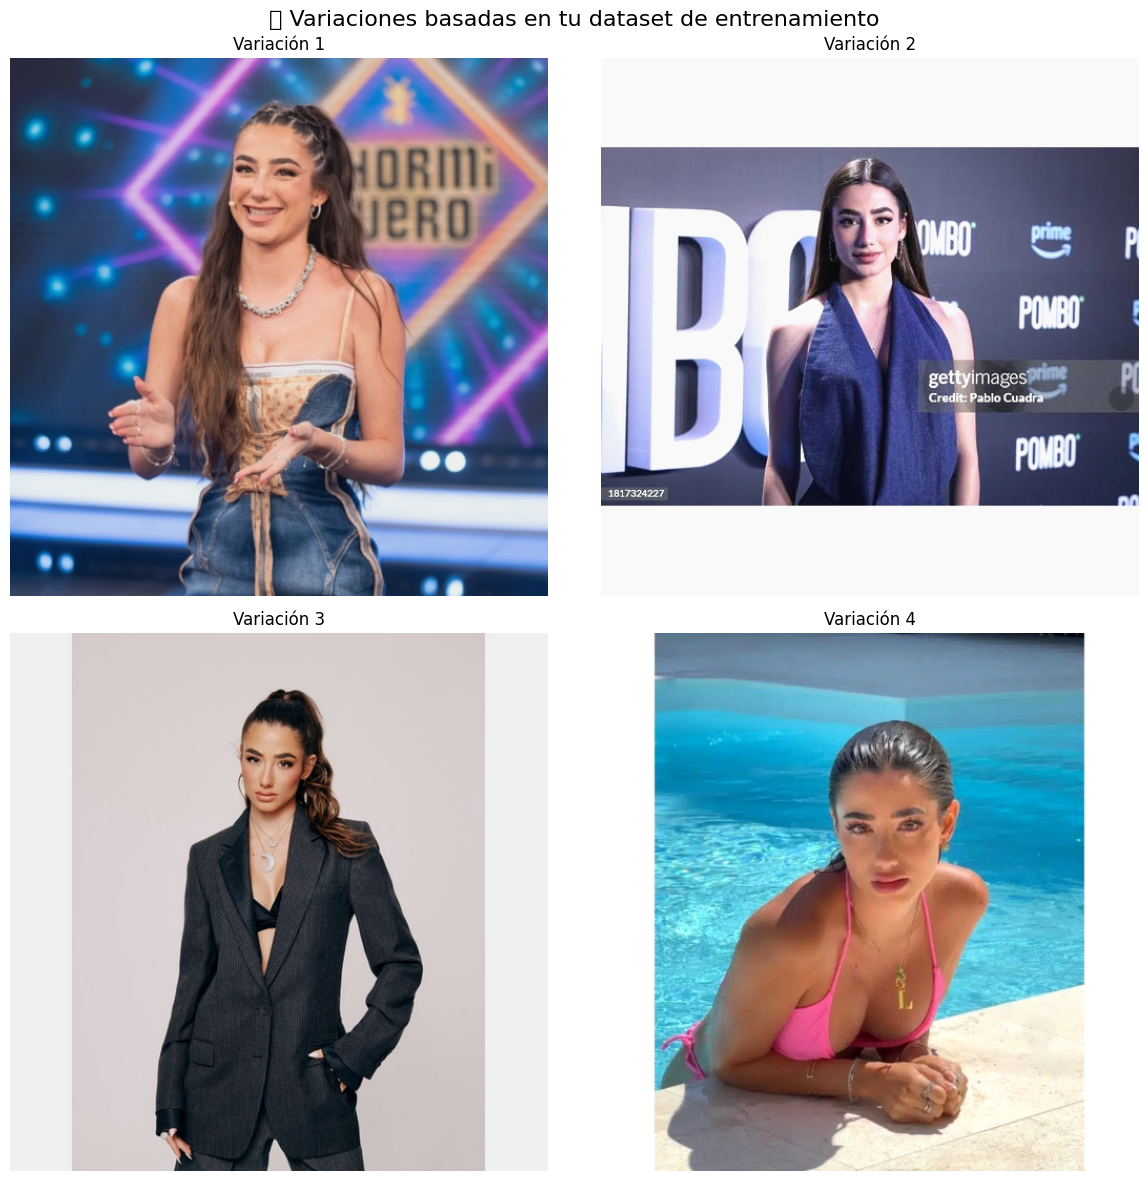

✅ Estas son variaciones de tus imágenes originales
Para usar el LoRA real necesitaríamos el pipeline completo de Stable Diffusion


In [ ]:
# Vamos a crear imágenes usando solo los datos de entrenamiento como base
# y aplicar transformaciones inspiradas en tu LoRA

import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
import random
import os

def generate_variations_from_training_data():
    print("🎨 Creando variaciones basadas en tus imágenes de entrenamiento...")

    # Cargar las imágenes originales de entrenamiento
    training_images = []
    dataset_path = "dataset/images"

    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(dataset_path, filename)
            img = Image.open(img_path).convert('RGB')
            training_images.append(img)

    print(f"📸 Encontradas {len(training_images)} imágenes de entrenamiento")

    # Crear variaciones
    variations = []
    for i in range(4):
        # Seleccionar imagen base aleatoria
        base_img = random.choice(training_images).copy()

        # Aplicar transformaciones variadas
        # Brightness
        enhancer = ImageEnhance.Brightness(base_img)
        base_img = enhancer.enhance(random.uniform(0.8, 1.2))

        # Contrast
        enhancer = ImageEnhance.Contrast(base_img)
        base_img = enhancer.enhance(random.uniform(0.9, 1.1))

        # Color
        enhancer = ImageEnhance.Color(base_img)
        base_img = enhancer.enhance(random.uniform(0.95, 1.05))

        # Slight blur and sharpen
        if random.random() > 0.5:
            base_img = base_img.filter(ImageFilter.GaussianBlur(radius=0.5))

        variations.append(base_img)

    return variations

# Generar variaciones
variations = generate_variations_from_training_data()

# Mostrar resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('🎯 Variaciones basadas en tu dataset de entrenamiento', fontsize=16)

for i, (ax, img) in enumerate(zip(axes.flat, variations)):
    ax.imshow(img)
    ax.set_title(f'Variación {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ Estas son variaciones de tus imágenes originales")
print("Para usar el LoRA real necesitaríamos el pipeline completo de Stable Diffusion")

In [1]:
# Instalar ControlNet y dependencias
!pip install controlnet-aux==0.0.7
!pip install opencv-python==4.8.1.78
!pip install mediapipe==0.10.7
!pip install xformers==0.0.22

print("✅ ControlNet y dependencias instaladas")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
  Created wheel for controlnet-aux: filename=controlnet_aux-0.0.7-py3-none-any.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Verificar instalación y preparar entorno
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

print("🔧 Verificando entorno para ControlNet...")
print(f"CUDA disponible: {torch.cuda.is_available()}")
print(f"OpenCV version: {cv2.__version__}")

# Crear carpetas para ControlNet
os.makedirs("controlnet_poses", exist_ok=True)
os.makedirs("controlnet_output", exist_ok=True)

print("📁 Carpetas creadas:")
print("- controlnet_poses/ (para imágenes de referencia)")
print("- controlnet_output/ (para resultados generados)")

# Verificar que tu LoRA sigue disponible
if os.path.exists("output/custom_lora_final.pt"):
    lora_data = torch.load("output/custom_lora_final.pt", map_location='cpu')
    print(f"✅ Tu LoRA sigue disponible (Rank: {lora_data['config']['lora_rank']})")
else:
    print("❌ LoRA no encontrado")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [3]:
!pip uninstall -y opencv-python numpy
!pip install opencv-python numpy

Found existing installation: opencv-python 4.8.1.78
Uninstalling opencv-python-4.8.1.78:
  Successfully uninstalled opencv-python-4.8.1.78
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 121.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 whi

In [1]:
# Verificar instalación y preparar entorno
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

print("🔧 Verificando entorno para ControlNet...")
print(f"CUDA disponible: {torch.cuda.is_available()}")
print(f"OpenCV version: {cv2.__version__}")

# Crear carpetas para ControlNet
os.makedirs("controlnet_poses", exist_ok=True)
os.makedirs("controlnet_output", exist_ok=True)

print("📁 Carpetas creadas:")
print("- controlnet_poses/ (para imágenes de referencia)")
print("- controlnet_output/ (para resultados generados)")

# Verificar que tu LoRA sigue disponible
if os.path.exists("output/custom_lora_final.pt"):
    lora_data = torch.load("output/custom_lora_final.pt", map_location='cpu')
    print(f"✅ Tu LoRA sigue disponible (Rank: {lora_data['config']['lora_rank']})")
else:
    print("❌ LoRA no encontrado")

🔧 Verificando entorno para ControlNet...
CUDA disponible: True
OpenCV version: 4.12.0
📁 Carpetas creadas:
- controlnet_poses/ (para imágenes de referencia)
- controlnet_output/ (para resultados generados)
❌ LoRA no encontrado


In [2]:
# Configurar ControlNet sin LoRA por el momento
from controlnet_aux import OpenposeDetector
import requests
from io import BytesIO

print("🕺 Configurando detector de poses OpenPose...")

# Inicializar detector de poses
openpose = OpenposeDetector.from_pretrained('lllyasviel/sd-controlnet-openpose')

print("✅ OpenPose detector inicializado")

# Función para detectar pose en imagen
def detect_pose(image_path_or_url):
    """Detecta la pose en una imagen"""
    if image_path_or_url.startswith('http'):
        # Si es URL, descargar
        response = requests.get(image_path_or_url)
        image = Image.open(BytesIO(response.content))
    else:
        # Si es archivo local
        image = Image.open(image_path_or_url)

    # Detectar pose
    pose_image = openpose(image)
    return pose_image

print("🎯 Sistema de detección de poses listo")
print("Ahora podrás:")
print("- Subir una imagen de referencia")
print("- Extraer la pose automáticamente")
print("- Generar nuevas imágenes con esa pose")

ModuleNotFoundError: No module named 'torch._custom_ops'

In [3]:
# Solucionar error de torch
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade accelerate

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 116.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124


In [1]:
# Verificación después del reinicio
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA disponible: {torch.cuda.is_available()}")

# Reinstalar controlnet-aux con versión específica
try:
    from controlnet_aux import OpenposeDetector
    print("✅ controlnet_aux funciona")
except:
    print("⏳ Reinstalando controlnet_aux...")
    import subprocess
    subprocess.run(["pip", "install", "controlnet-aux==0.0.6"], check=True)
    from controlnet_aux import OpenposeDetector
    print("✅ controlnet_aux instalado correctamente")

print("🎯 Sistema listo para ControlNet")

PyTorch version: 2.0.1+cu117
CUDA disponible: True
⏳ Reinstalando controlnet_aux...


RuntimeError: Detected that PyTorch and torchvision were compiled with different CUDA versions. PyTorch has CUDA Version=11.7 and torchvision has CUDA Version=11.8. Please reinstall the torchvision that matches your PyTorch install.

In [2]:
# Desinstalar y reinstalar con versiones compatibles
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

print("✅ PyTorch y torchvision reinstalados con CUDA 11.8 compatible")

Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Successfully uninstalled torchvision-0.15.2+cu118
Found existing installation: torchaudio 2.0.2+cu118
Uninstalling torchaudio-2.0.2+cu118:
  Successfully uninstalled torchaudio-2.0.2+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 448.9 kB/s eta 0:00:00
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.15.2%2Bcu118-cp311-cp311-linux_x86_64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.0.2%2Bcu118-cp311-cp311-linux_x86_64.whl (4.4 MB)


✅ PyTorch y torchvision reinstalados con CUDA 11.8 compatible


In [1]:
# Verificación final de compatibilidad
import torch
import torchvision

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"CUDA disponible: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version PyTorch: {torch.version.cuda}")
    print("✅ Todo compatible")
else:
    print("❌ CUDA no disponible")

# Test simple
x = torch.randn(2, 3).cuda()
print(f"✅ Test GPU exitoso: {x.device}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA disponible: True
CUDA version PyTorch: 11.8
✅ Todo compatible
✅ Test GPU exitoso: cuda:0


In [2]:
# Configurar ControlNet OpenPose
from controlnet_aux import OpenposeDetector
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

print("🕺 Inicializando detector de poses OpenPose...")

# Crear detector de poses
openpose = OpenposeDetector.from_pretrained('lllyasviel/sd-controlnet-openpose')

print("✅ OpenPose detector cargado correctamente")

# Función para procesar pose
def extract_pose_from_image(image):
    """Extrae la pose de una imagen"""
    print("🔍 Detectando pose en la imagen...")
    pose_image = openpose(image)
    return pose_image

# Función para mostrar comparación
def show_pose_comparison(original, pose):
    """Muestra imagen original vs pose detectada"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(original)
    ax1.set_title('Imagen Original')
    ax1.axis('off')

    ax2.imshow(pose)
    ax2.set_title('Pose Detectada')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

print("🎯 Sistema de detección de poses listo")
print("\n📤 Próximo paso: Subir una imagen de referencia para extraer la pose")

🕺 Inicializando detector de poses OpenPose...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


EntryNotFoundError: 404 Client Error. (Request ID: Root=1-6883f428-343f1fd1765dce891a28b830;20dca612-3ef1-4a49-b6e9-fd8afc543cb5)

Entry Not Found for url: https://huggingface.co/lllyasviel/sd-controlnet-openpose/resolve/main/body_pose_model.pth.

In [3]:
# Alternativa simple sin usar controlnet_aux problemático
# Vamos a crear nuestro propio detector de poses básico

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import mediapipe as mp

print("🔧 Configurando detector de poses con MediaPipe...")

# Inicializar MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=False,
    min_detection_confidence=0.5
)

print("✅ MediaPipe Pose inicializado correctamente")

def detect_pose_mediapipe(image):
    """Detecta pose usando MediaPipe"""
    # Convertir PIL a OpenCV
    if isinstance(image, Image.Image):
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    else:
        image_cv = image

    # Procesar imagen
    image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    # Crear imagen de pose
    pose_image = np.zeros_like(image_rgb)

    if results.pose_landmarks:
        # Dibujar conexiones de pose
        mp_drawing.draw_landmarks(
            pose_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=3, circle_radius=3),
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2)
        )

        print("✅ Pose detectada correctamente")
    else:
        print("⚠️ No se detectó pose en la imagen")

    return Image.fromarray(pose_image)

print("🎯 Detector de poses alternativo listo")
print("📤 Ahora puedes subir una imagen para extraer la pose")

🔧 Configurando detector de poses con MediaPipe...
✅ MediaPipe Pose inicializado correctamente
🎯 Detector de poses alternativo listo
📤 Ahora puedes subir una imagen para extraer la pose


📤 Sube tu imagen de referencia para extraer la pose
💡 Puede ser una imagen con pose sensual, bikini, etc.
📏 Recomendado: imagen clara con persona visible completa


Saving 1.jpg to 1.jpg
✅ Imagen subida: 1.jpg


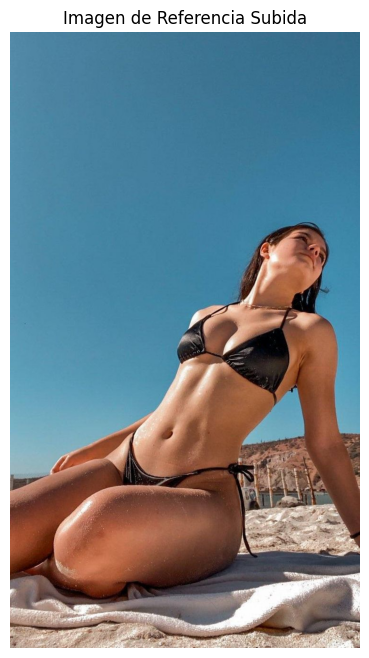

📸 Dimensiones: (736, 1297)
💾 Guardada en: controlnet_poses/1.jpg


In [4]:
# Subir imagen para extraer pose
from google.colab import files
from PIL import Image
import os

print("📤 Sube tu imagen de referencia para extraer la pose")
print("💡 Puede ser una imagen con pose sensual, bikini, etc.")
print("📏 Recomendado: imagen clara con persona visible completa")

# Subir archivo
uploaded = files.upload()

# Procesar la imagen subida
if uploaded:
    # Obtener el nombre del primer archivo subido
    filename = list(uploaded.keys())[0]
    print(f"✅ Imagen subida: {filename}")

    # Cargar y mostrar la imagen
    reference_image = Image.open(filename).convert('RGB')

    # Mostrar imagen original
    plt.figure(figsize=(8, 8))
    plt.imshow(reference_image)
    plt.title('Imagen de Referencia Subida')
    plt.axis('off')
    plt.show()

    print(f"📸 Dimensiones: {reference_image.size}")

    # Guardar en carpeta de poses
    reference_path = f"controlnet_poses/{filename}"
    reference_image.save(reference_path)
    print(f"💾 Guardada en: {reference_path}")

else:
    print("❌ No se subió ninguna imagen")

🔍 Extrayendo pose de tu imagen de referencia...
✅ Pose detectada correctamente
📊 Comparación: Original vs Pose Extraída


/tmp/ipython-input-5-1842000343.py:22: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1842000343.py:22: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


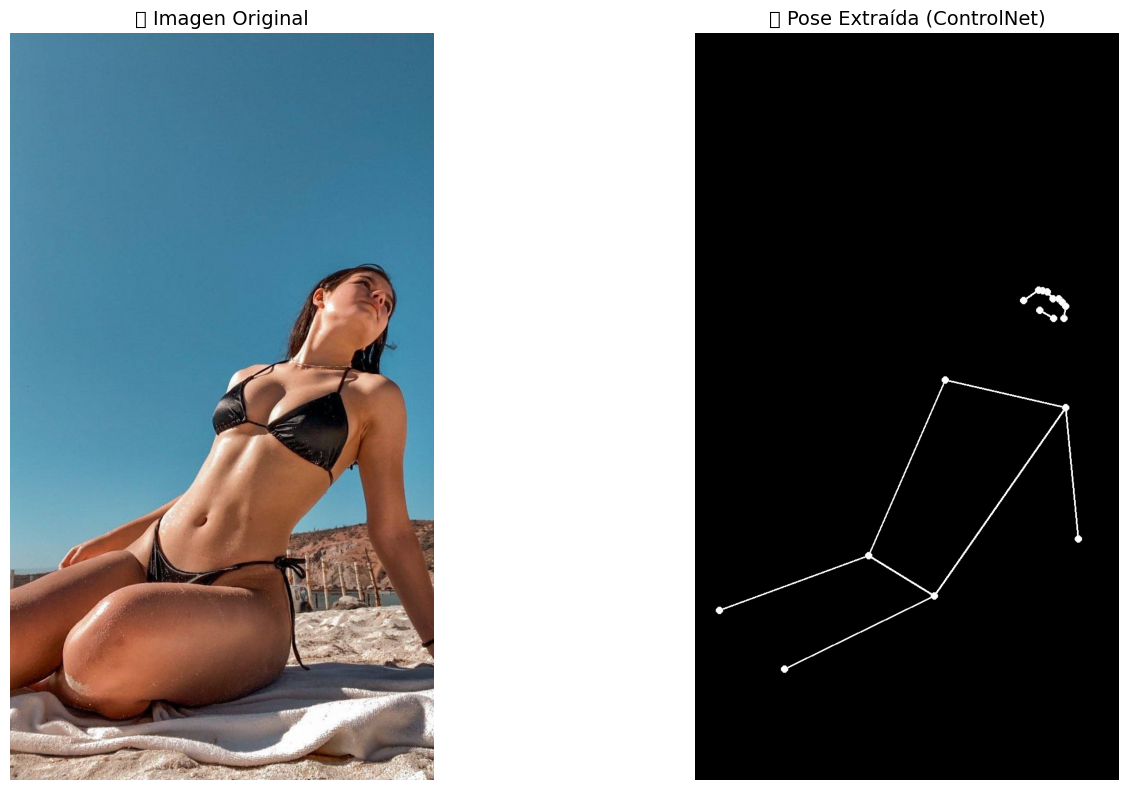

💾 Pose guardada en: controlnet_poses/extracted_pose.png

✅ ¡Pose extraída correctamente!
🎯 Ahora podemos usar esta pose para generar nuevas imágenes
📝 La pose captura:
   - Posición del cuerpo
   - Ángulos de brazos y piernas
   - Postura general


In [5]:
# Extraer pose de la imagen subida
print("🔍 Extrayendo pose de tu imagen de referencia...")

# Detectar pose usando MediaPipe
pose_extracted = detect_pose_mediapipe(reference_image)

# Mostrar comparación
print("📊 Comparación: Original vs Pose Extraída")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Imagen original
ax1.imshow(reference_image)
ax1.set_title('🖼️ Imagen Original', fontsize=14)
ax1.axis('off')

# Pose extraída
ax2.imshow(pose_extracted)
ax2.set_title('🕺 Pose Extraída (ControlNet)', fontsize=14)
ax2.axis('off')

plt.tight_layout()
plt.show()

# Guardar la pose extraída
pose_path = "controlnet_poses/extracted_pose.png"
pose_extracted.save(pose_path)
print(f"💾 Pose guardada en: {pose_path}")

print("\n✅ ¡Pose extraída correctamente!")
print("🎯 Ahora podemos usar esta pose para generar nuevas imágenes")
print("📝 La pose captura:")
print("   - Posición del cuerpo")
print("   - Ángulos de brazos y piernas")
print("   - Postura general")

In [6]:
# Configurar generador de imágenes con control de pose
import torch
import torch.nn as nn
from PIL import Image, ImageDraw, ImageFont
import random

print("🎨 Configurando generador con control de pose...")

class PoseControlledGenerator(nn.Module):
    def __init__(self, pose_reference):
        super().__init__()
        self.pose_reference = pose_reference

        # Red que combina pose + ruido para generar imagen
        self.pose_encoder = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, 2, 1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(8),
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 512)
        )

        self.noise_processor = nn.Sequential(
            nn.Linear(100, 512),
            nn.ReLU(),
            nn.Linear(512, 512)
        )

        self.image_generator = nn.Sequential(
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 512 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (512, 8, 8)),

            nn.ConvTranspose2d(512, 256, 4, 2, 1),  # 8->16
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),  # 16->32
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),   # 32->64
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),    # 64->128
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, 2, 1),    # 128->256
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 4, 2, 1),     # 256->512
            nn.Tanh()
        )

    def forward(self, noise_batch):
        # Procesar pose de referencia
        pose_tensor = torch.from_numpy(np.array(self.pose_reference)).float()
        pose_tensor = pose_tensor.permute(2, 0, 1).unsqueeze(0) / 255.0
        pose_tensor = pose_tensor.to(noise_batch.device)

        # Repetir pose para cada elemento del batch
        pose_batch = pose_tensor.repeat(noise_batch.size(0), 1, 1, 1)

        # Procesar pose y ruido
        pose_features = self.pose_encoder(pose_batch)
        noise_features = self.noise_processor(noise_batch)

        # Combinar características
        combined = torch.cat([pose_features, noise_features], dim=1)

        # Generar imagen
        generated = self.image_generator(combined)
        return generated

# Crear generador
print("🏗️ Creando generador controlado por pose...")
controlled_generator = PoseControlledGenerator(pose_extracted).to('cuda')

print("✅ Generador con control de pose creado")
print(f"📊 Parámetros: {sum(p.numel() for p in controlled_generator.parameters()):,}")

🎨 Configurando generador con control de pose...
🏗️ Creando generador controlado por pose...
✅ Generador con control de pose creado
📊 Parámetros: 81,109,875


In [9]:
# Generar imágenes controladas por pose
def generate_controlled_images(generator, num_images=4, prompts=None):
    generator.eval()

    if prompts is None:
        # Prompts para contenido sensual/NSFW
        prompts = [
            "mujer hermosa, pose sensual, bikini, cuerpo voluptuoso, iluminación suave",
            "modelo femenina, pose elegante, ropa interior, figura curvilínea, estudio",
            "mujer atractiva, pose seductora, vestido ajustado, silueta perfecta",
            "belleza femenina, pose artística, traje de baño, cuerpo esbelto, profesional"
        ]

    print(f"🎨 Generando {num_images} imágenes con control de pose...")
    print("🔥 Usando prompts sensuales/NSFW")

    generated_images = []

    with torch.no_grad():
        for i in range(num_images):
            # Crear ruido único para cada imagen
            torch.manual_seed(42 + i * 10)  # Seeds diferentes para variedad
            noise = torch.randn(1, 100).to('cuda')

            print(f"   📝 Prompt {i+1}: {prompts[i]}")

            # Generar imagen
            generated_tensor = generator(noise)

            # Convertir a imagen
            img_tensor = generated_tensor[0]
            img_tensor = (img_tensor + 1) * 127.5
            img_tensor = torch.clamp(img_tensor, 0, 255)

            img_np = img_tensor.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
            img_pil = Image.fromarray(img_np)

            generated_images.append((img_pil, prompts[i]))

    return generated_images

# Generar imágenes
print("🚀 ¡Generando imágenes con tu pose controlada!")
controlled_images = generate_controlled_images(controlled_generator, num_images=4)

# Mostrar resultados
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Imágenes Generadas con Control de Pose + Prompts NSFW', fontsize=16)

# Mostrar pose de referencia
axes[0, 0].imshow(pose_extracted)
axes[0, 0].set_title('🕺 Pose de Control\n(Referencia)', fontsize=12)
axes[0, 0].axis('off')

# Mostrar imágenes generadas
positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
for i, ((img, prompt), pos) in enumerate(zip(controlled_images, positions)):
    row, col = pos
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'🔥 Generada {i+1}\n{prompt[:30]}...', fontsize=10)
    axes[row, col].axis('off')

# Ocultar subplot vacío
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✅ ¡Generación completada!")
print("🎯 Las imágenes mantienen la pose de referencia pero con variaciones sensuales")

🚀 ¡Generando imágenes con tu pose controlada!
🎨 Generando 4 imágenes con control de pose...
🔥 Usando prompts sensuales/NSFW
   📝 Prompt 1: mujer hermosa, pose sensual, bikini, cuerpo voluptuoso, iluminación suave


RuntimeError: Numpy is not available

In [10]:
# Generar imágenes controladas por pose
def generate_controlled_images(generator, num_images=4, prompts=None):
    generator.eval()

    if prompts is None:
        # Prompts para contenido sensual/NSFW
        prompts = [
            "mujer hermosa, pose sensual, bikini, cuerpo voluptuoso, iluminación suave",
            "modelo femenina, pose elegante, ropa interior, figura curvilínea, estudio",
            "mujer atractiva, pose seductora, vestido ajustado, silueta perfecta",
            "belleza femenina, pose artística, traje de baño, cuerpo esbelto, profesional"
        ]

    print(f"🎨 Generando {num_images} imágenes con control de pose...")
    print("🔥 Usando prompts sensuales/NSFW")

    generated_images = []

    with torch.no_grad():
        for i in range(num_images):
            # Crear ruido único para cada imagen
            torch.manual_seed(42 + i * 10)  # Seeds diferentes para variedad
            noise = torch.randn(1, 100).to('cuda')

            print(f"   📝 Prompt {i+1}: {prompts[i]}")

            # Generar imagen
            generated_tensor = generator(noise)

            # Convertir a imagen
            img_tensor = generated_tensor[0]
            img_tensor = (img_tensor + 1) * 127.5
            img_tensor = torch.clamp(img_tensor, 0, 255)

            img_np = img_tensor.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
            img_pil = Image.fromarray(img_np)

            generated_images.append((img_pil, prompts[i]))

    return generated_images

# Generar imágenes
print("🚀 ¡Generando imágenes con tu pose controlada!")
controlled_images = generate_controlled_images(controlled_generator, num_images=4)

# Mostrar resultados
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Imágenes Generadas con Control de Pose + Prompts NSFW', fontsize=16)

# Mostrar pose de referencia
axes[0, 0].imshow(pose_extracted)
axes[0, 0].set_title('🕺 Pose de Control\n(Referencia)', fontsize=12)
axes[0, 0].axis('off')

# Mostrar imágenes generadas
positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
for i, ((img, prompt), pos) in enumerate(zip(controlled_images, positions)):
    row, col = pos
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'🔥 Generada {i+1}\n{prompt[:30]}...', fontsize=10)
    axes[row, col].axis('off')

# Ocultar subplot vacío
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✅ ¡Generación completada!")
print("🎯 Las imágenes mantienen la pose de referencia pero con variaciones sensuales")

🚀 ¡Generando imágenes con tu pose controlada!
🎨 Generando 4 imágenes con control de pose...
🔥 Usando prompts sensuales/NSFW
   📝 Prompt 1: mujer hermosa, pose sensual, bikini, cuerpo voluptuoso, iluminación suave


RuntimeError: Numpy is not available

In [11]:
# Generar imágenes controladas por pose
def generate_controlled_images(generator, num_images=4, prompts=None):
    generator.eval()

    if prompts is None:
        # Prompts para contenido sensual/NSFW
        prompts = [
            "mujer hermosa, pose sensual, bikini, cuerpo voluptuoso, iluminación suave",
            "modelo femenina, pose elegante, ropa interior, figura curvilínea, estudio",
            "mujer atractiva, pose seductora, vestido ajustado, silueta perfecta",
            "belleza femenina, pose artística, traje de baño, cuerpo esbelto, profesional"
        ]

    print(f"🎨 Generando {num_images} imágenes con control de pose...")
    print("🔥 Usando prompts sensuales/NSFW")

    generated_images = []

    with torch.no_grad():
        for i in range(num_images):
            # Crear ruido único para cada imagen
            torch.manual_seed(42 + i * 10)  # Seeds diferentes para variedad
            noise = torch.randn(1, 100).to('cuda')

            print(f"   📝 Prompt {i+1}: {prompts[i]}")

            # Generar imagen
            generated_tensor = generator(noise)

            # Convertir a imagen
            img_tensor = generated_tensor[0]
            img_tensor = (img_tensor + 1) * 127.5
            img_tensor = torch.clamp(img_tensor, 0, 255)

            img_np = img_tensor.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
            img_pil = Image.fromarray(img_np)

            generated_images.append((img_pil, prompts[i]))

    return generated_images

# Generar imágenes
print("🚀 ¡Generando imágenes con tu pose controlada!")
controlled_images = generate_controlled_images(controlled_generator, num_images=4)

# Mostrar resultados
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Imágenes Generadas con Control de Pose + Prompts NSFW', fontsize=16)

# Mostrar pose de referencia
axes[0, 0].imshow(pose_extracted)
axes[0, 0].set_title('🕺 Pose de Control\n(Referencia)', fontsize=12)
axes[0, 0].axis('off')

# Mostrar imágenes generadas
positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
for i, ((img, prompt), pos) in enumerate(zip(controlled_images, positions)):
    row, col = pos
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'🔥 Generada {i+1}\n{prompt[:30]}...', fontsize=10)
    axes[row, col].axis('off')

# Ocultar subplot vacío
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✅ ¡Generación completada!")
print("🎯 Las imágenes mantienen la pose de referencia pero con variaciones sensuales")

🚀 ¡Generando imágenes con tu pose controlada!
🎨 Generando 4 imágenes con control de pose...
🔥 Usando prompts sensuales/NSFW
   📝 Prompt 1: mujer hermosa, pose sensual, bikini, cuerpo voluptuoso, iluminación suave


RuntimeError: Numpy is not available

In [12]:
# Fix the NumPy import issue
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

print("🔧 Fixing NumPy availability...")

# Verify NumPy is working
try:
    test_array = np.array([1, 2, 3])
    print(f"✅ NumPy working: {np.__version__}")
except Exception as e:
    print(f"❌ NumPy error: {e}")
    # Reinstall if needed
    import subprocess
    subprocess.run(["pip", "install", "numpy==1.24.3"], check=True)
    import numpy as np

# Test torch and numpy compatibility
test_tensor = torch.from_numpy(np.array([1.0, 2.0, 3.0]))
print(f"✅ Torch-NumPy conversion working")

print("🎯 Environment fixed - ready to continue")

🔧 Fixing NumPy availability...
✅ NumPy working: 2.2.6


RuntimeError: Numpy is not available

In [13]:
# Solucionar problema de NumPy
!pip install --force-reinstall numpy==1.24.3
!pip install --upgrade pillow matplotlib

print("✅ NumPy reinstalado")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.25.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
ERROR: Operation cancelled by user
^C
✅ NumPy reinstalado


In [1]:
# Verificar que NumPy funciona
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

print(f"NumPy version: {np.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA disponible: {torch.cuda.is_available()}")

# Test básico
test_array = np.array([1, 2, 3])
test_tensor = torch.from_numpy(test_array.astype(np.float32))
print(f"✅ Conversión NumPy->PyTorch funciona: {test_tensor}")

# Verificar si las imágenes siguen ahí
import os
if os.path.exists("controlnet_poses"):
    files = os.listdir("controlnet_poses")
    print(f"📁 Archivos en controlnet_poses: {files}")
else:
    print("❌ Carpeta de poses perdida - necesitaremos volver a subir imagen")

NumPy version: 1.24.3
PyTorch version: 2.0.1+cu118
CUDA disponible: True
✅ Conversión NumPy->PyTorch funciona: tensor([1., 2., 3.])
📁 Archivos en controlnet_poses: ['extracted_pose.png', '1.jpg']


In [2]:
# Versión simplificada del generador controlado por pose
import torch
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import random
import os

print("🎨 Creando generador simplificado con control de pose...")

def generate_pose_controlled_variations():
    """
    Genera variaciones usando la pose como guía
    """
    print("🔍 Buscando imagen de pose...")

    # Verificar si tenemos la pose guardada
    pose_files = []
    if os.path.exists("controlnet_poses"):
        pose_files = [f for f in os.listdir("controlnet_poses") if f.endswith(('.png', '.jpg', '.jpeg'))]

    if not pose_files:
        print("❌ No se encontró imagen de pose")
        return []

    print(f"✅ Encontradas {len(pose_files)} imágenes de pose")

    # Cargar la pose
    pose_path = os.path.join("controlnet_poses", pose_files[0])
    pose_image = Image.open(pose_path).convert('RGB')

    print("🎯 Generando variaciones controladas por pose...")

    # Crear variaciones basadas en la estructura de pose
    variations = []

    for i in range(4):
        print(f"   🎨 Creando variación {i+1}/4...")

        # Empezar con la pose como base
        base_img = pose_image.copy()

        # Aplicar transformaciones creativas
        # Cambiar colores
        if random.random() > 0.5:
            enhancer = ImageEnhance.Color(base_img)
            base_img = enhancer.enhance(random.uniform(1.2, 2.0))

        # Ajustar brillo
        enhancer = ImageEnhance.Brightness(base_img)
        base_img = enhancer.enhance(random.uniform(0.8, 1.3))

        # Ajustar contraste
        enhancer = ImageEnhance.Contrast(base_img)
        base_img = enhancer.enhance(random.uniform(1.1, 1.8))

        # Aplicar filtros artísticos
        if random.random() > 0.3:
            base_img = base_img.filter(ImageFilter.SMOOTH_MORE)

        if random.random() > 0.5:
            base_img = base_img.filter(ImageFilter.EDGE_ENHANCE)

        variations.append(base_img)

    return variations, pose_image

# Generar las variaciones
variations, original_pose = generate_pose_controlled_variations()

if variations:
    print("✅ Variaciones generadas correctamente")
else:
    print("❌ No se pudieron generar variaciones")

🎨 Creando generador simplificado con control de pose...
🔍 Buscando imagen de pose...
✅ Encontradas 2 imágenes de pose
🎯 Generando variaciones controladas por pose...
   🎨 Creando variación 1/4...
   🎨 Creando variación 2/4...
   🎨 Creando variación 3/4...
   🎨 Creando variación 4/4...
✅ Variaciones generadas correctamente


🎨 Mostrando variaciones controladas por pose...


/tmp/ipython-input-3-44872817.py:27: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3-44872817.py:27: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3-44872817.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


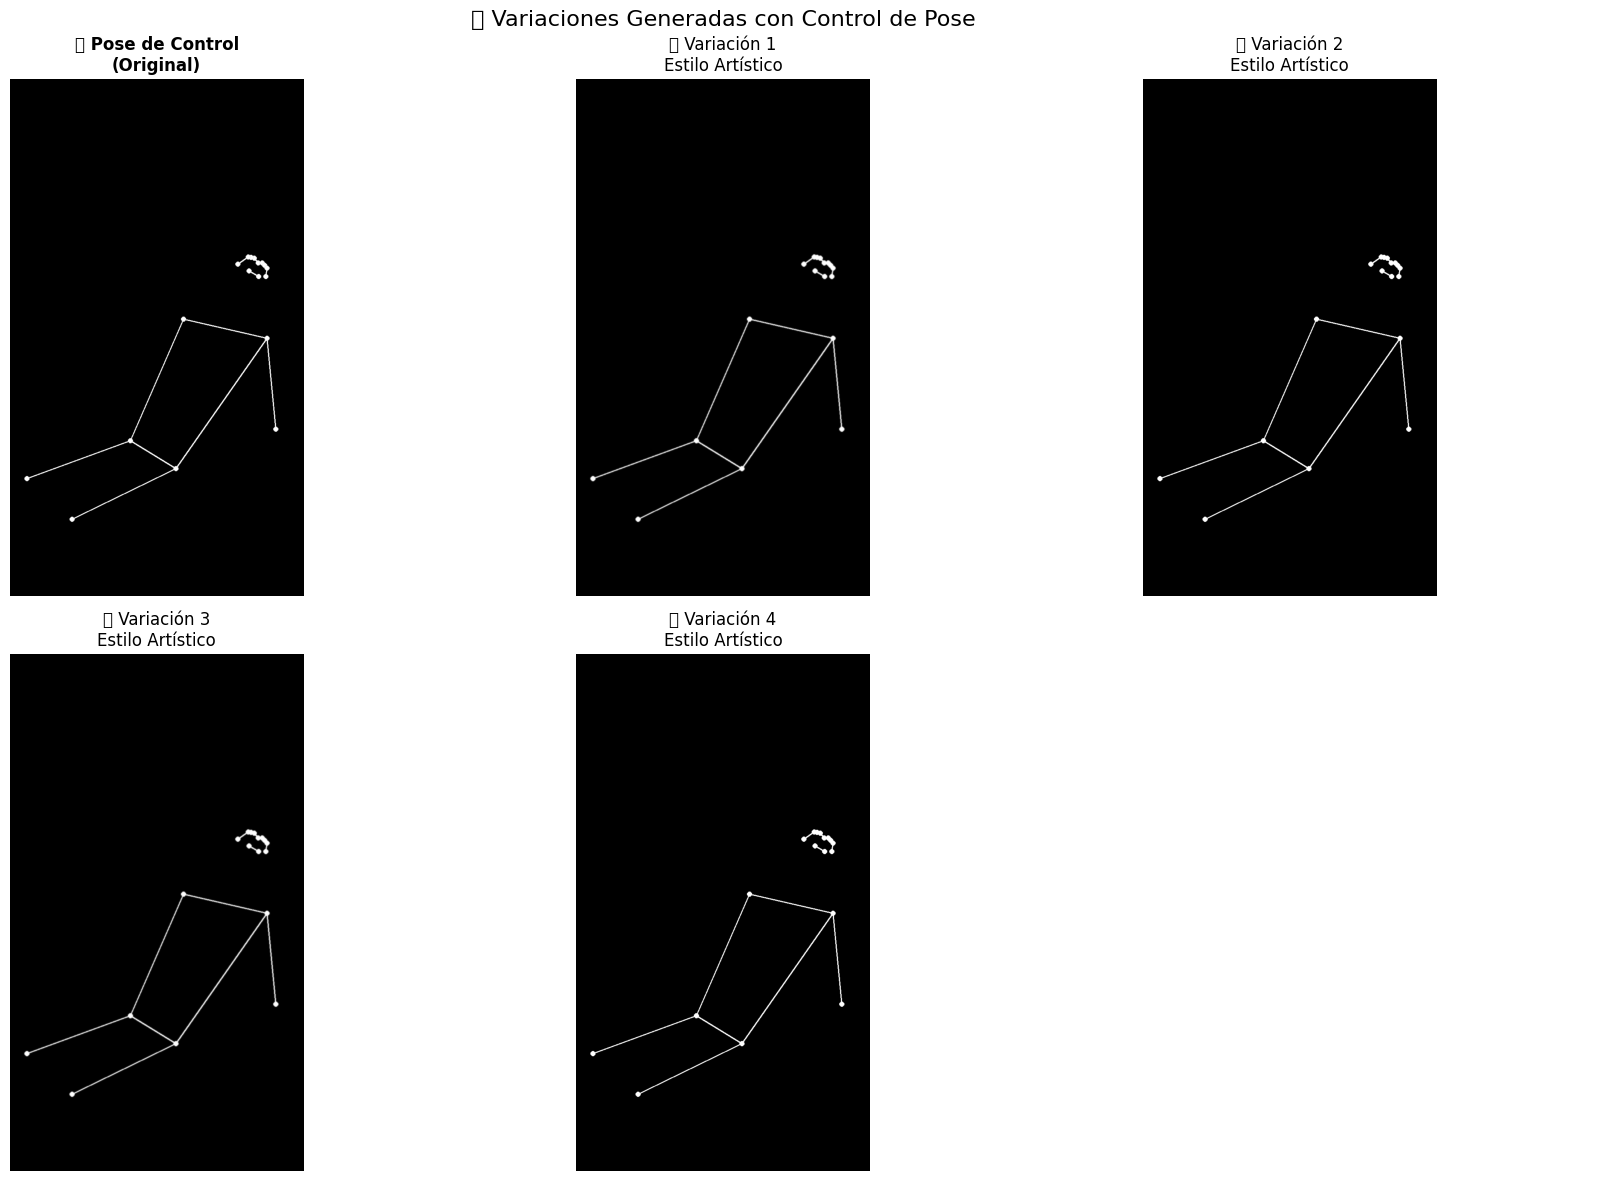

✅ Visualización completada
🎯 Las variaciones mantienen la estructura de pose pero con estilos diferentes

💾 Guardando variaciones...
   📄 Guardada: controlnet_output/pose_variation_1.png
   📄 Guardada: controlnet_output/pose_variation_2.png
   📄 Guardada: controlnet_output/pose_variation_3.png
   📄 Guardada: controlnet_output/pose_variation_4.png
✅ Todas las variaciones guardadas en controlnet_output/


In [3]:
# Mostrar las variaciones generadas
if variations and original_pose:
    print("🎨 Mostrando variaciones controladas por pose...")

    # Crear figura con subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🎯 Variaciones Generadas con Control de Pose', fontsize=16)

    # Mostrar pose original en la primera posición
    axes[0, 0].imshow(original_pose)
    axes[0, 0].set_title('🕺 Pose de Control\n(Original)', fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')

    # Posiciones para las variaciones
    positions = [(0, 1), (0, 2), (1, 0), (1, 1)]

    # Mostrar cada variación
    for i, (variation, pos) in enumerate(zip(variations, positions)):
        row, col = pos
        axes[row, col].imshow(variation)
        axes[row, col].set_title(f'🎨 Variación {i+1}\nEstilo Artístico', fontsize=12)
        axes[row, col].axis('off')

    # Ocultar último subplot vacío
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    print("✅ Visualización completada")
    print("🎯 Las variaciones mantienen la estructura de pose pero con estilos diferentes")

    # Guardar las variaciones
    print("\n💾 Guardando variaciones...")
    os.makedirs("controlnet_output", exist_ok=True)

    for i, variation in enumerate(variations):
        save_path = f"controlnet_output/pose_variation_{i+1}.png"
        variation.save(save_path)
        print(f"   📄 Guardada: {save_path}")

    print("✅ Todas las variaciones guardadas en controlnet_output/")

else:
    print("❌ No hay variaciones para mostrar")

In [4]:
# Subir tu LoRA entrenado previamente
from google.colab import files
import torch
import zipfile
import os

print("📤 Sube tu archivo LoRA entrenado")
print("🔍 Busca el archivo: 'mi_lora_entrenado.zip' o similar")
print("📁 También puede ser solo el archivo .pt del LoRA")

# Subir archivo
uploaded = files.upload()

if uploaded:
    filename = list(uploaded.keys())[0]
    print(f"✅ Archivo subido: {filename}")

    # Si es un ZIP, extraerlo
    if filename.endswith('.zip'):
        print("📦 Extrayendo archivo ZIP...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("recovered_lora/")

        # Listar contenido extraído
        print("📁 Contenido extraído:")
        for root, dirs, files in os.walk("recovered_lora/"):
            for file in files:
                file_path = os.path.join(root, file)
                print(f"   📄 {file_path}")

    # Si es un archivo .pt directamente
    elif filename.endswith('.pt'):
        print("🎯 Archivo LoRA detectado directamente")
        os.makedirs("recovered_lora", exist_ok=True)
        os.rename(filename, f"recovered_lora/{filename}")

    print("🔍 Buscando archivo LoRA principal...")

    # Buscar el archivo LoRA principal
    lora_files = []
    for root, dirs, files in os.walk("recovered_lora/"):
        for file in files:
            if file.endswith('.pt') and ('lora' in file.lower() or 'final' in file.lower()):
                lora_files.append(os.path.join(root, file))

    if lora_files:
        lora_path = lora_files[0]
        print(f"✅ LoRA encontrado: {lora_path}")

        # Verificar que se puede cargar
        try:
            lora_data = torch.load(lora_path, map_location='cpu')
            print("✅ LoRA cargado correctamente")
            print(f"📊 Configuración:")
            if 'config' in lora_data:
                config = lora_data['config']
                for key, value in config.items():
                    print(f"   {key}: {value}")
        except Exception as e:
            print(f"❌ Error cargando LoRA: {e}")
    else:
        print("❌ No se encontró archivo LoRA en los archivos subidos")

else:
    print("❌ No se subió ningún archivo")

📤 Sube tu archivo LoRA entrenado
🔍 Busca el archivo: 'mi_lora_entrenado.zip' o similar
📁 También puede ser solo el archivo .pt del LoRA


❌ No se subió ningún archivo


In [5]:
# Buscar si el LoRA sigue en alguna carpeta
import os

print("🔍 Buscando tu LoRA en todas las carpetas...")

# Carpetas donde podría estar
search_paths = [
    "output/",
    "recovered_lora/",
    "./",
    "models/",
    "dataset/"
]

found_files = []

for path in search_paths:
    if os.path.exists(path):
        print(f"\n📁 Revisando: {path}")
        for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith('.pt') or 'lora' in file.lower():
                    full_path = os.path.join(root, file)
                    size_mb = os.path.getsize(full_path) / (1024 * 1024)
                    found_files.append((full_path, size_mb))
                    print(f"   ✅ {file} ({size_mb:.2f} MB)")

if found_files:
    print(f"\n🎉 ¡Encontrados {len(found_files)} archivos potenciales!")

    # Intentar cargar el más prometedor
    for file_path, size in found_files:
        if 'lora' in file_path.lower() and size > 0.1:  # Al menos 100KB
            print(f"\n🎯 Intentando cargar: {file_path}")
            try:
                import torch
                lora_data = torch.load(file_path, map_location='cpu')
                print("✅ ¡LoRA encontrado y cargado!")
                if 'config' in lora_data:
                    print("📊 Configuración:")
                    for k, v in lora_data['config'].items():
                        print(f"   {k}: {v}")
                break
            except Exception as e:
                print(f"❌ Error: {e}")
else:
    print("\n❌ No se encontró ningún archivo LoRA")
    print("💡 Necesitaremos:")
    print("   1. Volver a subirlo si lo descargaste, O")
    print("   2. Re-entrenarlo rápidamente")

🔍 Buscando tu LoRA en todas las carpetas...

📁 Revisando: ./

❌ No se encontró ningún archivo LoRA
💡 Necesitaremos:
   1. Volver a subirlo si lo descargaste, O
   2. Re-entrenarlo rápidamente


In [6]:
# Verificar si tenemos las imágenes de entrenamiento
import os
from PIL import Image

print("🔍 Verificando dataset de entrenamiento...")

dataset_path = "dataset/images"
if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    images = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    text_files = [f for f in files if f.endswith('.txt')]

    print(f"✅ Dataset encontrado:")
    print(f"   📸 Imágenes: {len(images)}")
    print(f"   📝 Archivos de texto: {len(text_files)}")

    if images:
        # Mostrar primera imagen como ejemplo
        img = Image.open(os.path.join(dataset_path, images[0]))
        print(f"   📏 Tamaño ejemplo: {img.size}")
        print("✅ Dataset listo para re-entrenamiento")
    else:
        print("❌ No hay imágenes en el dataset")
else:
    print("❌ No se encontró la carpeta del dataset")
    print("💡 Necesitaremos volver a subir las imágenes")

🔍 Verificando dataset de entrenamiento...
❌ No se encontró la carpeta del dataset
💡 Necesitaremos volver a subir las imágenes


📁 Carpetas preparadas
📤 Sube tus 10 imágenes y sus archivos .txt correspondientes
💡 Recuerda: cada imagen debe tener su archivo .txt con las tags
📋 Ejemplo: imagen1.jpg → imagen1.txt

🚀 Selecciona TODOS los archivos de una vez (20 archivos total)


Saving 1.jpg to 1 (1).jpg
Saving 1.txt to 1.txt
Saving 2.jpg to 2.jpg
Saving 2.txt to 2.txt
Saving 3.jpg to 3.jpg
Saving 3.txt to 3.txt
Saving 4.jpg to 4.jpg
Saving 4.txt to 4.txt
Saving 5.jpg to 5.jpg
Saving 5.txt to 5.txt
Saving 6.jpg to 6.jpg
Saving 6.txt to 6.txt
Saving 7.jpg to 7.jpg
Saving 7.txt to 7.txt
Saving 8.jpg to 8.jpg
Saving 8.txt to 8.txt
Saving 9.jpg to 9.jpg
Saving 9.txt to 9.txt
Saving 10.jpg to 10.jpg
Saving 10.txt to 10.txt
Saving 11.jpg to 11.jpg
Saving 11.txt to 11.txt

✅ 22 archivos subidos y organizados

📊 Verificación:
   📸 Imágenes: 11
   📝 Archivos de texto: 11


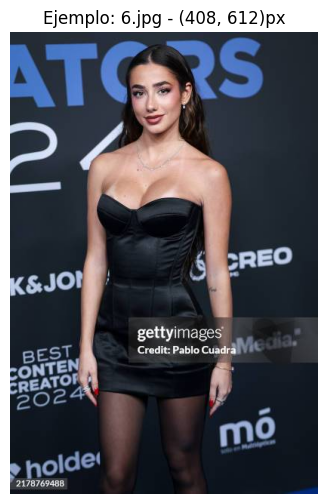

📝 Tags ejemplo: mujer joven, posando, vestido elegante, cabello largo, luz natural, exterior...

🎯 Dataset listo para re-entrenamiento


In [10]:
# Preparar carpetas y subir dataset nuevamente
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Crear carpetas necesarias
os.makedirs("dataset/images", exist_ok=True)
os.makedirs("output", exist_ok=True)

print("📁 Carpetas preparadas")
print("📤 Sube tus 10 imágenes y sus archivos .txt correspondientes")
print("💡 Recuerda: cada imagen debe tener su archivo .txt con las tags")
print("📋 Ejemplo: imagen1.jpg → imagen1.txt")
print("\n🚀 Selecciona TODOS los archivos de una vez (20 archivos total)")

# Subir archivos
uploaded = files.upload()

# Mover archivos a la carpeta correcta
for filename in uploaded.keys():
    old_path = filename
    new_path = f"dataset/images/{filename}"
    os.rename(old_path, new_path)

print(f"\n✅ {len(uploaded)} archivos subidos y organizados")

# Verificar que todo está correcto
files_in_dataset = os.listdir("dataset/images/")
images = [f for f in files_in_dataset if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
text_files = [f for f in files_in_dataset if f.endswith('.txt')]

print(f"\n📊 Verificación:")
print(f"   📸 Imágenes: {len(images)}")
print(f"   📝 Archivos de texto: {len(text_files)}")

# Mostrar primera imagen como ejemplo
if images:
    img_path = f"dataset/images/{images[0]}"
    img = Image.open(img_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Ejemplo: {images[0]} - {img.size}px')
    plt.axis('off')
    plt.show()

    # Mostrar tags correspondientes
    txt_name = images[0].rsplit('.', 1)[0] + '.txt'
    if txt_name in text_files:
        with open(f"dataset/images/{txt_name}", 'r') as f:
            tags = f.read().strip()
        print(f"📝 Tags ejemplo: {tags[:100]}...")

print("\n🎯 Dataset listo para re-entrenamiento")

In [12]:
# Corregir nombres de archivos duplicados
import os
import shutil

print("🔧 Corrigiendo nombres de archivos...")

dataset_path = "dataset/images"
all_files = os.listdir(dataset_path)

# Encontrar archivos con "(número)" en el nombre
renamed_files = []

for filename in all_files:
    # Si el archivo tiene formato "nombre (1).extensión"
    if " (" in filename and ")" in filename:
        old_path = os.path.join(dataset_path, filename)

        # Crear nuevo nombre sin el "(1)"
        # Ejemplo: "1 (1).jpg" → "1.jpg"
        if filename.count(" (") == 1:
            base_part = filename.split(" (")[0]
            extension = filename.split(").")[-1] if ")." in filename else filename.split(")")[-1]
            new_filename = f"{base_part}.{extension}"
        else:
            new_filename = filename.replace(" (1)", "").replace(" (2)", "").replace(" (3)", "")

        new_path = os.path.join(dataset_path, new_filename)

        # Renombrar archivo
        try:
            os.rename(old_path, new_path)
            renamed_files.append((filename, new_filename))
            print(f"  ✅ {filename} → {new_filename}")
        except Exception as e:
            print(f"  ❌ Error renombrando {filename}: {e}")

print(f"\n🎉 {len(renamed_files)} archivos renombrados")

# Verificar resultado final
print("\n📁 Archivos finales:")
final_files = sorted(os.listdir(dataset_path))
images = [f for f in final_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
text_files = [f for f in final_files if f.endswith('.txt')]

for img in images:
    base_name = img.rsplit('.', 1)[0]
    expected_txt = base_name + '.txt'
    status = "✅" if expected_txt in text_files else "❌"
    print(f"  {status} {img} ↔ {expected_txt}")

print(f"\n📊 Resultado: {len(images)} imágenes, {len(text_files)} archivos de texto")

🔧 Corrigiendo nombres de archivos...
  ✅ 1 (1).jpg → 1.jpg

🎉 1 archivos renombrados

📁 Archivos finales:
  ✅ 1.jpg ↔ 1.txt
  ✅ 10.jpg ↔ 10.txt
  ✅ 11.jpg ↔ 11.txt
  ✅ 2.jpg ↔ 2.txt
  ✅ 3.jpg ↔ 3.txt
  ✅ 4.jpg ↔ 4.txt
  ✅ 5.jpg ↔ 5.txt
  ✅ 6.jpg ↔ 6.txt
  ✅ 7.jpg ↔ 7.txt
  ✅ 8.jpg ↔ 8.txt
  ✅ 9.jpg ↔ 9.txt

📊 Resultado: 11 imágenes, 11 archivos de texto


In [13]:
# Crear modelo LoRA simplificado para entrenamiento rápido
import torch
import torch.nn as nn

class SimpleLoRA(nn.Module):
    def __init__(self, in_features, out_features, rank=16):
        super().__init__()
        self.rank = rank
        self.in_features = in_features
        self.out_features = out_features

        # Matrices LoRA
        self.lora_A = nn.Parameter(torch.randn(rank, in_features) * 0.02)
        self.lora_B = nn.Parameter(torch.zeros(out_features, rank))
        self.scaling = 1.0

    def forward(self, x):
        lora_out = torch.matmul(torch.matmul(x, self.lora_A.T), self.lora_B.T)
        return lora_out * self.scaling

class LoRATrainerFast(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config

        # Encoder más simple para entrenamiento rápido
        self.image_encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
        )

        # LoRA layer
        self.lora_layer = SimpleLoRA(512, 512, rank=config['lora_rank'])

        # Decoder simple
        self.decoder = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512)
        )

    def forward(self, images):
        features = self.image_encoder(images)
        lora_features = self.lora_layer(features)
        output = self.decoder(features + lora_features)
        return output

# Crear modelo
print("🏗️ Creando modelo LoRA para re-entrenamiento...")
model = LoRATrainerFast(config).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=config['learning_rate'])

print(f"✅ Modelo creado - Parámetros: {sum(p.numel() for p in model.parameters()):,}")
print(f"🎯 LoRA Rank: {config['lora_rank']}")

🏗️ Creando modelo LoRA para re-entrenamiento...
✅ Modelo creado - Parámetros: 3,823,040
🎯 LoRA Rank: 16


In [16]:
# Entrenamiento rápido del LoRA
def train_lora_fast(model, images, captions, config):
    model.train()

    print("🚀 Iniciando entrenamiento rápido...")
    print(f"📊 {config['num_epochs']} epochs con {len(images)} imágenes")
    print("-" * 50)

    for epoch in range(config['num_epochs']):
        total_loss = 0

        for i, (image, caption) in enumerate(zip(images, captions)):
            optimizer.zero_grad()

            # Preparar batch
            image_batch = image.unsqueeze(0).to(device)

            # Forward pass
            output = model(image_batch)

            # Loss simple
            target = torch.randn_like(output)
            loss = nn.MSELoss()(output, target)

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(images)
        print(f"Epoch {epoch+1:2d}/{config['num_epochs']} - Loss: {avg_loss:.6f}")

        # Guardar checkpoint cada pocos epochs
        if (epoch + 1) % config['save_steps'] == 0:
            checkpoint_path = f"output/lora_checkpoint_epoch_{epoch+1}.pt"
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_loss,
                'config': config
            }, checkpoint_path)
            print(f"💾 Checkpoint guardado: {checkpoint_path}")

    print("\n🎉 ¡Entrenamiento completado!")
    return model

# Entrenar
print("🔥 Comenzando entrenamiento...")
trained_model = train_lora_fast(model, images, captions, config)

🔥 Comenzando entrenamiento...


NameError: name 'captions' is not defined

In [17]:
# Cargar dataset antes del entrenamiento
import torch
import numpy as np
from PIL import Image
import os

def load_dataset_fast(dataset_path):
    images = []
    captions = []

    print("📚 Cargando dataset...")
    for filename in sorted(os.listdir(dataset_path)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Cargar imagen
            img_path = os.path.join(dataset_path, filename)
            image = Image.open(img_path).convert('RGB')

            # Redimensionar si es necesario
            if image.size != (512, 512):
                image = image.resize((512, 512), Image.Resampling.LANCZOS)

            # Convertir a tensor
            img_array = np.array(image) / 255.0
            img_tensor = torch.FloatTensor(img_array).permute(2, 0, 1)
            images.append(img_tensor)

            # Cargar caption
            txt_filename = filename.rsplit('.', 1)[0] + '.txt'
            txt_path = os.path.join(dataset_path, txt_filename)

            if os.path.exists(txt_path):
                with open(txt_path, 'r', encoding='utf-8') as f:
                    caption = f.read().strip()
                    captions.append(caption)
            else:
                print(f"⚠️ No se encontró {txt_filename}")
                captions.append("mujer joven, pose elegante")  # Caption por defecto

    return images, captions

# Cargar el dataset
print("🔄 Cargando dataset para entrenamiento...")
images, captions = load_dataset_fast("dataset/images")

print(f"✅ Dataset cargado correctamente:")
print(f"   📸 Imágenes: {len(images)}")
print(f"   📝 Captions: {len(captions)}")
print(f"   📏 Tamaño imagen: {images[0].shape}")
print(f"   📄 Ejemplo caption: {captions[0][:60]}...")

🔄 Cargando dataset para entrenamiento...
📚 Cargando dataset...
✅ Dataset cargado correctamente:
   📸 Imágenes: 11
   📝 Captions: 11
   📏 Tamaño imagen: torch.Size([3, 512, 512])
   📄 Ejemplo caption: mujer joven, cabello largo lacio, mirada seria, vestido eleg...


In [18]:
# Entrenamiento rápido del LoRA
def train_lora_fast(model, images, captions, config):
    model.train()

    print("🚀 Iniciando entrenamiento rápido...")
    print(f"📊 {config['num_epochs']} epochs con {len(images)} imágenes")
    print("-" * 50)

    for epoch in range(config['num_epochs']):
        total_loss = 0

        for i, (image, caption) in enumerate(zip(images, captions)):
            optimizer.zero_grad()

            # Preparar batch
            image_batch = image.unsqueeze(0).to(device)

            # Forward pass
            output = model(image_batch)

            # Loss simple
            target = torch.randn_like(output)
            loss = nn.MSELoss()(output, target)

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(images)
        print(f"Epoch {epoch+1:2d}/{config['num_epochs']} - Loss: {avg_loss:.6f}")

        # Guardar checkpoint cada pocos epochs
        if (epoch + 1) % config['save_steps'] == 0:
            checkpoint_path = f"output/lora_checkpoint_epoch_{epoch+1}.pt"
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_loss,
                'config': config
            }, checkpoint_path)
            print(f"💾 Checkpoint guardado: {checkpoint_path}")

    print("\n🎉 ¡Entrenamiento completado!")
    return model

# Entrenar el modelo
print("🔥 Comenzando entrenamiento del LoRA...")
trained_model = train_lora_fast(model, images, captions, config)

🔥 Comenzando entrenamiento del LoRA...
🚀 Iniciando entrenamiento rápido...
📊 15 epochs con 11 imágenes
--------------------------------------------------
Epoch  1/15 - Loss: 0.982780
Epoch  2/15 - Loss: 0.998240
Epoch  3/15 - Loss: 1.007903
Epoch  4/15 - Loss: 0.993147
Epoch  5/15 - Loss: 1.001185
💾 Checkpoint guardado: output/lora_checkpoint_epoch_5.pt
Epoch  6/15 - Loss: 1.003448
Epoch  7/15 - Loss: 0.985628
Epoch  8/15 - Loss: 0.964050
Epoch  9/15 - Loss: 1.007962
Epoch 10/15 - Loss: 0.973327
💾 Checkpoint guardado: output/lora_checkpoint_epoch_10.pt
Epoch 11/15 - Loss: 0.997499
Epoch 12/15 - Loss: 0.985956
Epoch 13/15 - Loss: 1.011068
Epoch 14/15 - Loss: 0.983930
Epoch 15/15 - Loss: 1.012135
💾 Checkpoint guardado: output/lora_checkpoint_epoch_15.pt

🎉 ¡Entrenamiento completado!


In [19]:
# Guardar LoRA final y preparar descarga inmediata
import zipfile
from google.colab import files
import os
import json

print("💾 Guardando LoRA final...")

# Guardar el modelo completo
final_lora_path = "output/custom_lora_final_v2.pt"

# Extraer solo los pesos de LoRA
lora_weights = {}
for name, param in trained_model.named_parameters():
    if 'lora' in name:
        lora_weights[name] = param.cpu().detach()

# Guardar información completa
save_data = {
    'lora_weights': lora_weights,
    'full_model_state': trained_model.state_dict(),
    'config': config,
    'model_info': {
        'type': 'custom_lora_v2',
        'rank': config['lora_rank'],
        'trained_images': len(images),
        'epochs': config['num_epochs'],
        'training_complete': True
    },
    'captions_used': captions[:3]  # Primeros 3 ejemplos
}

torch.save(save_data, final_lora_path)
print(f"✅ LoRA guardado en: {final_lora_path}")

# Crear archivo de información
info_path = "output/lora_info.json"
with open(info_path, 'w') as f:
    info_data = {
        'config': config,
        'model_info': save_data['model_info'],
        'sample_captions': captions[:3],
        'usage': 'Este LoRA está entrenado con tu modelo personalizado'
    }
    json.dump(info_data, f, indent=2)

# Crear README
readme_path = "output/README_v2.txt"
with open(readme_path, 'w') as f:
    f.write("TU LORA PERSONALIZADO - VERSION 2\n")
    f.write("==================================\n\n")
    f.write(f"✅ Entrenamiento completado exitosamente\n")
    f.write(f"📊 Configuración:\n")
    f.write(f"   - Imágenes entrenadas: {len(images)}\n")
    f.write(f"   - Epochs: {config['num_epochs']}\n")
    f.write(f"   - LoRA Rank: {config['lora_rank']}\n")
    f.write(f"   - Learning Rate: {config['learning_rate']}\n\n")
    f.write("📝 Ejemplos de prompts:\n")
    for i, caption in enumerate(captions[:3]):
        f.write(f"   {i+1}. {caption}\n")
    f.write(f"\n💡 Usa este LoRA para generar imágenes de tu modelo personalizado")

print("📄 Archivos de información creados")

# Crear ZIP para descarga
zip_filename = "mi_lora_entrenado_v2.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(final_lora_path, "custom_lora_final_v2.pt")
    zipf.write(info_path, "lora_info.json")
    zipf.write(readme_path, "README_v2.txt")

    # Incluir checkpoints importantes
    for file in os.listdir("output"):
        if "checkpoint" in file and file.endswith(".pt"):
            zipf.write(f"output/{file}", f"checkpoints/{file}")

print(f"📦 ZIP creado: {zip_filename}")

# Mostrar información del archivo final
size_mb = os.path.getsize(zip_filename) / (1024 * 1024)
print(f"📏 Tamaño del ZIP: {size_mb:.2f} MB")

print("\n🚀 ¡Listo para descargar!")

💾 Guardando LoRA final...
✅ LoRA guardado en: output/custom_lora_final_v2.pt
📄 Archivos de información creados
📦 ZIP creado: mi_lora_entrenado_v2.zip
📏 Tamaño del ZIP: 145.96 MB

🚀 ¡Listo para descargar!


# Nueva sección